# 1. Perkenalan
## Nama : Raymond Samuel
## Batch : RMT-030
## Dataset : Mushroom
### Dataset url : https://archive.ics.uci.edu/dataset/73/mushroom
### Deployment url : https://huggingface.co/spaces/Raymond-Samuel/Milestone-2-Raymond-Samuel
### Objective : Membuat model classifikasi mushroom sehingga pada saat melakukan riet tentang jamur atau sedang bepetualang ke alam luar dapat menggunakan model ini untuk mengklasifikasikan jamur tsb merupakan poisonous apa tidak berdasarkan ciri-ciri dari jamur tersebut.

# 2. Import Libraries

In [1]:
# !pip install ucimlrepo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# dataset import
from ucimlrepo import fetch_ucirepo

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA

from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, f1_score

# 3. Data Loading

In [3]:
# fetch dataset
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
X = mushroom.data.features
y = mushroom.data.targets
df = pd.concat([X, y], axis=1)

# metadata
print(mushroom.metadata)

# variable information
print(mushroom.variables)

{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

In [4]:
# Define mapping dictionaries
cap_shape_dict = {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'}
cap_surface_dict = {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'}
cap_color_dict = {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'}
bruises_dict = {'t': 'bruises', 'f': 'no'}
odor_dict = {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'}
gill_attachment_dict = {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'}
gill_spacing_dict = {'c': 'close', 'w': 'crowded', 'd': 'distant'}
gill_size_dict = {'b': 'broad', 'n': 'narrow'}
gill_color_dict = {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'}
stalk_shape_dict = {'e': 'enlarging', 't': 'tapering'}
stalk_root_dict = {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted', '?': 'missing'}
stalk_surface_above_ring_dict = {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'}
stalk_surface_below_ring_dict = {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'}
stalk_color_above_ring_dict = {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'}
stalk_color_below_ring_dict = {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'}
veil_type_dict = {'p': 'partial', 'u': 'universal'}
veil_color_dict = {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'}
ring_number_dict = {'n': 'none', 'o': 'one', 't': 'two'}
ring_type_dict = {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'}
spore_print_color_dict = {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'}
population_dict = {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'}
habitat_dict = {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'}
poisonous_dict = {'e': 'edible', 'p': 'poisonous'}

# Apply the mapping to the dataframe
df['cap-shape'] = df['cap-shape'].map(cap_shape_dict)
df['cap-surface'] = df['cap-surface'].map(cap_surface_dict)
df['cap-color'] = df['cap-color'].map(cap_color_dict)
df['bruises'] = df['bruises'].map(bruises_dict)
df['odor'] = df['odor'].map(odor_dict)
df['gill-attachment'] = df['gill-attachment'].map(gill_attachment_dict)
df['gill-spacing'] = df['gill-spacing'].map(gill_spacing_dict)
df['gill-size'] = df['gill-size'].map(gill_size_dict)
df['gill-color'] = df['gill-color'].map(gill_color_dict)
df['stalk-shape'] = df['stalk-shape'].map(stalk_shape_dict)
df['stalk-root'] = df['stalk-root'].map(stalk_root_dict)
df['stalk-surface-above-ring'] = df['stalk-surface-above-ring'].map(stalk_surface_above_ring_dict)
df['stalk-surface-below-ring'] = df['stalk-surface-below-ring'].map(stalk_surface_below_ring_dict)
df['stalk-color-above-ring'] = df['stalk-color-above-ring'].map(stalk_color_above_ring_dict)
df['stalk-color-below-ring'] = df['stalk-color-below-ring'].map(stalk_color_below_ring_dict)
df['veil-type'] = df['veil-type'].map(veil_type_dict)
df['veil-color'] = df['veil-color'].map(veil_color_dict)
df['ring-number'] = df['ring-number'].map(ring_number_dict)
df['ring-type'] = df['ring-type'].map(ring_type_dict)
df['spore-print-color'] = df['spore-print-color'].map(spore_print_color_dict)
df['population'] = df['population'].map(population_dict)
df['habitat'] = df['habitat'].map(habitat_dict)
df['poisonous'] = df['poisonous'].map(poisonous_dict)


# 4. EDA

In [5]:
df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,...,white,white,partial,white,one,pendant,black,scattered,urban,poisonous
1,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,...,white,white,partial,white,one,pendant,brown,numerous,grasses,edible
2,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,...,white,white,partial,white,one,pendant,brown,numerous,meadows,edible
3,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,...,white,white,partial,white,one,pendant,black,scattered,urban,poisonous
4,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,...,white,white,partial,white,one,evanescent,brown,abundant,grasses,edible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,knobbed,smooth,brown,no,none,attached,close,broad,yellow,enlarging,...,orange,orange,partial,orange,one,pendant,buff,clustered,leaves,edible
8120,convex,smooth,brown,no,none,attached,close,broad,yellow,enlarging,...,orange,orange,partial,brown,one,pendant,buff,several,leaves,edible
8121,flat,smooth,brown,no,none,attached,close,broad,brown,enlarging,...,orange,orange,partial,orange,one,pendant,buff,clustered,leaves,edible
8122,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,tapering,...,white,white,partial,white,one,evanescent,white,several,leaves,poisonous


## Distribution of Edible vs. Poisonous Mushrooms

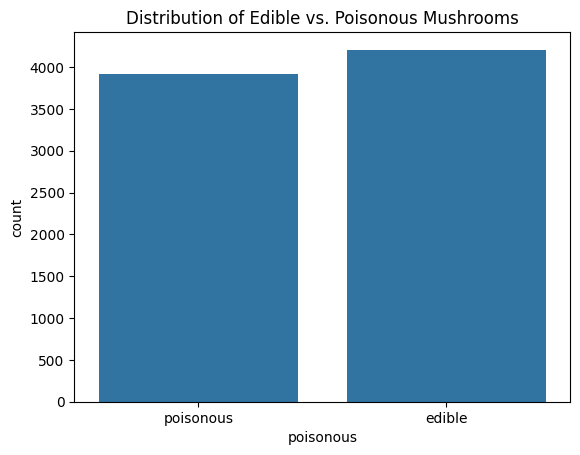

In [6]:
sns.countplot(x='poisonous', data=df)
plt.title("Distribution of Edible vs. Poisonous Mushrooms")
plt.show()

In [7]:
df['poisonous'].value_counts()

poisonous
edible       4208
poisonous    3916
Name: count, dtype: int64

Dari dataset dapat dilihat Data `edible` ada 4208 lebih banyak dariapda `poisonous` ada 3916.

## Distribution of Mushrooms by odor

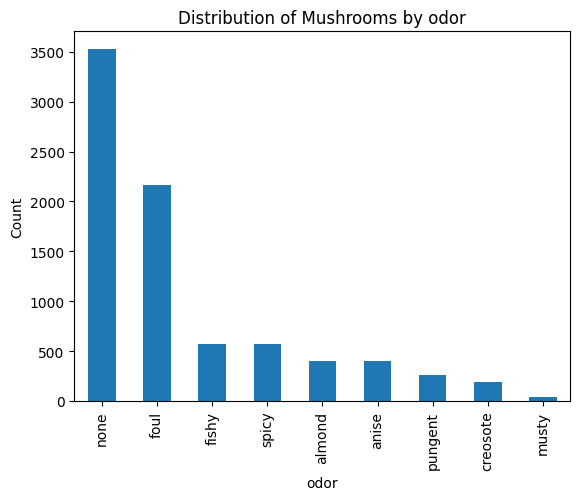

In [8]:
feature_to_plot = 'odor'
df[feature_to_plot].value_counts().plot(kind='bar')
plt.title(f"Distribution of Mushrooms by {feature_to_plot}")
plt.xlabel(feature_to_plot)
plt.ylabel("Count")
plt.show()

Mushroom terbanyak yaitu dengan `odor` = `none`, yaitu tidak ada bau

## Distribution of odor by Class

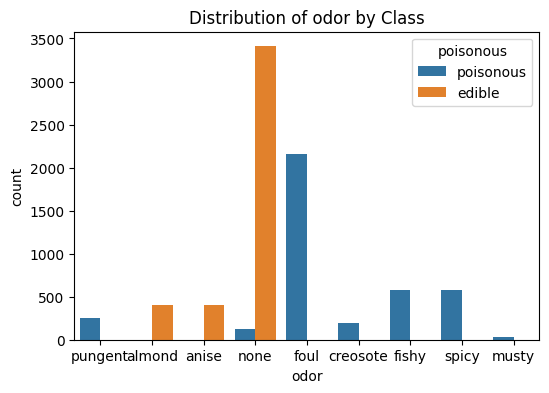

In [9]:
feature_to_analyze = 'odor'

plt.figure(figsize=(6, 4))
sns.countplot(x=feature_to_analyze, hue='poisonous', data=df)
plt.title(f"Distribution of {feature_to_analyze} by Class")
plt.show()

Dapat dilihat dari hasil plot diatas, bahwa jamur yang `foul_odor` bisa di kategorikan sebagai poisonous

## Distribution of cap-shape by Class

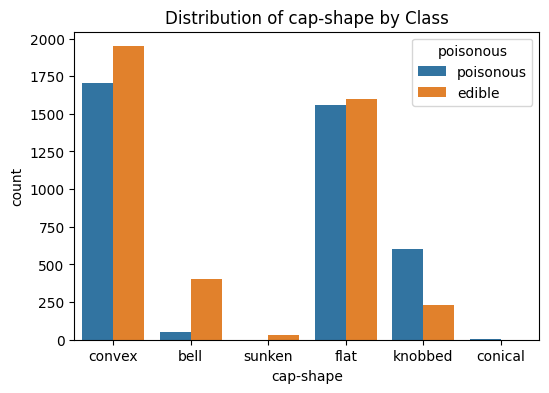

In [10]:
feature_to_analyze = 'cap-shape'

plt.figure(figsize=(6, 4))
sns.countplot(x=feature_to_analyze, hue='poisonous', data=df)
plt.title(f"Distribution of {feature_to_analyze} by Class")
plt.show()

Dari dataset, pada umumnya mushroom banyak yang memiliki `cap-shape` `convex` dan `flat`, baik pada jamur `poisonous` maupun `edible`.

## Distribution of habitat by Class

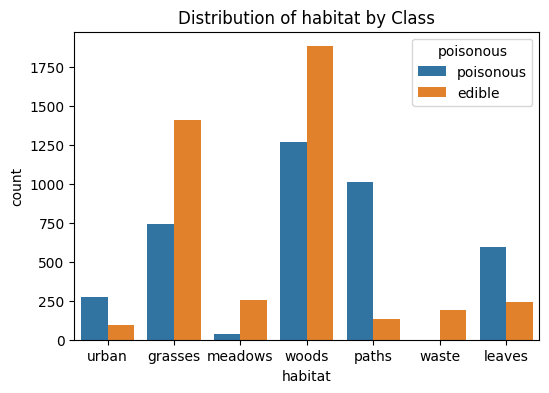

In [11]:
feature_to_analyze = 'habitat'

plt.figure(figsize=(6, 4))
sns.countplot(x=feature_to_analyze, hue='poisonous', data=df)
plt.title(f"Distribution of {feature_to_analyze} by Class")
plt.show()

Dari dataset, mushroom `poisonous` lebih banyak terletak pada habitat `woods` disusul dengan `paths`.

# 5. Feature Engineering

## Handling Cardinality

In [12]:
pd.set_option('display.max_colwidth', None)

cat_cols = list(df.select_dtypes(include='object').columns)

listItem = []
for col in cat_cols:
  listItem.append([col, df[col].nunique(), df[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,cap-shape,6,"[convex, bell, sunken, flat, knobbed, conical]"
1,cap-surface,4,"[smooth, scaly, fibrous, grooves]"
2,cap-color,10,"[brown, yellow, white, gray, red, pink, buff, purple, cinnamon, green]"
3,bruises,2,"[bruises, no]"
4,odor,9,"[pungent, almond, anise, none, foul, creosote, fishy, spicy, musty]"
5,gill-attachment,2,"[free, attached]"
6,gill-spacing,2,"[close, crowded]"
7,gill-size,2,"[narrow, broad]"
8,gill-color,12,"[black, brown, gray, pink, white, chocolate, purple, red, buff, green, yellow, orange]"
9,stalk-shape,2,"[enlarging, tapering]"


Tidak perlu handling cardinality karena masih rendah

## Handling missing value

In [13]:
X.isnull().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

Column `stalk-root` memiliki 2480 Missing value sehingga sebaiknya tidak digunakan.

In [14]:
X = X.drop(columns=['stalk-root'], axis=1)

In [15]:
X.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## Splitting Between Train-set and Test-set

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print('Train_size: ' , X_train.shape)
print('Test_size: ', X_test.shape)

Train_size:  (6499, 21)
Test_size:  (1625, 21)


## Encoding

Columns object berisi nilai categorical / binary multi class sehingga encoding digunakan OHE untuk X.

In [17]:
# One-hot encoding
onehot_encoder = OneHotEncoder()
# onehot_encoded = onehot_encoder.fit_transform(df[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']])

# Ubah label 'e' dan 'p' menjadi 0 dan 1
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

c:\Users\RaymondS\anaconda3\envs\Phase1\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\RaymondS\anaconda3\envs\Phase1\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


## PCA

In [18]:
# pca = PCA()
# pca.fit(X_scaled)

In [19]:
# # Plot the Cummulative of Explained Variance Ratio
# plt.figure(figsize=(15, 5))
# plt.subplot(1, 2, 1)
# plt.grid()
# plt.plot(range(1, 4), np.cumsum(pca.explained_variance_ratio_ * 100))
# plt.xlabel('Number of components')
# plt.ylabel('Explained Variance Ratio - Cummulative')

# # Plot the Eigenvalues
# plt.subplot(1, 2, 2)
# plt.grid()
# plt.plot(range(1, 4), pca.explained_variance_ )
# plt.xlabel('Number of components')
# plt.ylabel('Eigenvalues')

Tidak digunakan pca karna data lebih ke kategorical yang di encode.

## Column Transformer

In [20]:
#Making column transformer for preprocessing
transformer = ColumnTransformer([
# ('scaler', StandardScaler(), selector(dtype_exclude='object')),
('encoding', OneHotEncoder(), selector(dtype_include='object'))
])

In [21]:
X_train.shape

(6499, 21)

# Modelling

In [22]:
#Making pipeline for KNN
pipe_knn = Pipeline([
('transformer', transformer),
('classifier', KNeighborsClassifier()),
])

# Making pipeline for SVM
pipe_svm = Pipeline([
('transformer', transformer),
('classifier', SVC()),
])

#Making pipeline for Decision Tree
pipe_dt = Pipeline([
('transformer', transformer),
('classifier', DecisionTreeClassifier())
])

#Making pipeline for Random Forest
pipe_rf = Pipeline([
('transformer', transformer),
('classifier', RandomForestClassifier())
])

#Making pipeline for XGBoost
pipe_xgb = Pipeline([
('transformer', transformer),
('classifier', XGBClassifier())
])

# 6. Base Model Eval

## KNN

In [23]:
pipe_knn.fit(X_train, y_train)
print('Training Score: ',round(pipe_knn.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_knn.score(X_test, y_test),4))

Training Score:  1.0
Testing Score:  1.0


In [24]:
y_logreg_pred = pipe_knn.predict(X_test)
y_logreg_pred

array([0, 1, 1, ..., 1, 1, 1])

In [25]:
target = ['edible', 'poisonous']
print(classification_report(y_test, y_logreg_pred, target_names = target))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [26]:
#Cross Validation

f1_train_cross_val = cross_val_score(pipe_knn,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [1. 1. 1.]
F1 Score - Mean - Cross Validation :  1.0
F1 Score - Std - Cross Validation  :  0.0
F1 Score - Range of Test-Set       :  1.0 - 1.0


## SVM

In [27]:
pipe_svm.fit(X_train, y_train)
print('Training Score: ',round(pipe_svm.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_svm.score(X_test, y_test),4))

Training Score:  1.0
Testing Score:  1.0


In [28]:
y_logreg_pred = pipe_svm.predict(X_test)
y_logreg_pred

array([0, 1, 1, ..., 1, 1, 1])

In [29]:
target = ['edible', 'poisonous']
print(classification_report(y_test, y_logreg_pred, target_names = target))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



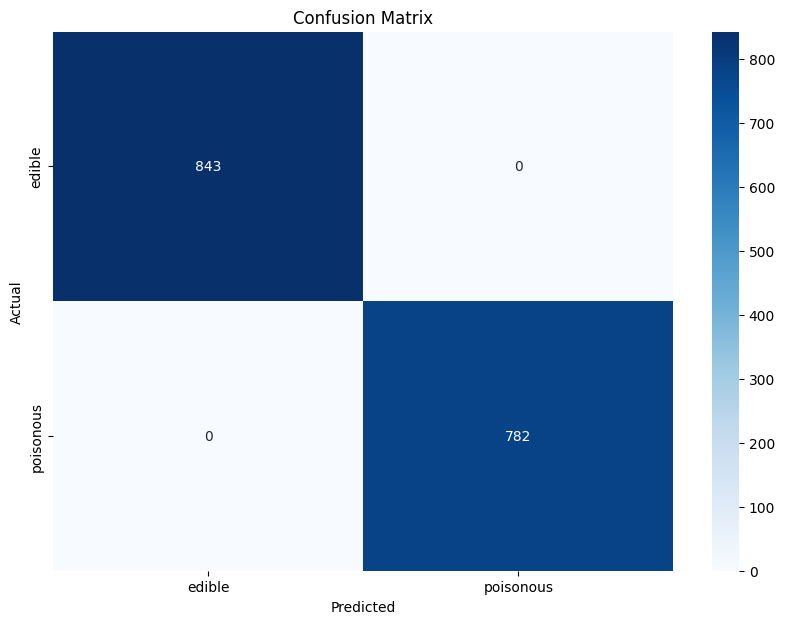

In [30]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_logreg_pred)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=target, columns=target)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [31]:
#Cross Validation

f1_train_cross_val = cross_val_score(pipe_svm,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [1. 1. 1.]
F1 Score - Mean - Cross Validation :  1.0
F1 Score - Std - Cross Validation  :  0.0
F1 Score - Range of Test-Set       :  1.0 - 1.0


## Decision Tree

In [32]:
pipe_dt.fit(X_train, y_train)
print('Training Score: ',round(pipe_dt.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_dt.score(X_test, y_test),4))

Training Score:  1.0
Testing Score:  1.0


In [33]:
y_logreg_pred = pipe_dt.predict(X_test)
y_logreg_pred

array([0, 1, 1, ..., 1, 1, 1])

In [34]:
target = ['edible', 'poisonous']
print(classification_report(y_test, y_logreg_pred, target_names = target))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [35]:
#Cross Validation
f1_train_cross_val = cross_val_score(pipe_dt,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [1. 1. 1.]
F1 Score - Mean - Cross Validation :  1.0
F1 Score - Std - Cross Validation  :  0.0
F1 Score - Range of Test-Set       :  1.0 - 1.0


## Random Forest

In [36]:
pipe_rf.fit(X_train, y_train)
print('Training Score: ',round(pipe_rf.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_rf.score(X_test, y_test),4))

Training Score:  1.0
Testing Score:  1.0


In [37]:
y_logreg_pred = pipe_dt.predict(X_test)
y_logreg_pred

array([0, 1, 1, ..., 1, 1, 1])

In [38]:
target = ['edible', 'poisonous']
print(classification_report(y_test, y_logreg_pred, target_names = target))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [39]:
#Cross Validation

f1_train_cross_val = cross_val_score(pipe_rf,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [1. 1. 1.]
F1 Score - Mean - Cross Validation :  1.0
F1 Score - Std - Cross Validation  :  0.0
F1 Score - Range of Test-Set       :  1.0 - 1.0


## XGBoost

In [40]:
pipe_xgb.fit(X_train, y_train)
print('Training Score: ',round(pipe_xgb.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_xgb.score(X_test, y_test),4))

Training Score:  1.0
Testing Score:  1.0


In [41]:
y_logreg_pred = pipe_xgb.predict(X_test)
y_logreg_pred

array([0, 1, 1, ..., 1, 1, 1])

In [42]:
target = ['edible', 'poisonous']
print(classification_report(y_test, y_logreg_pred, target_names = target))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [43]:
#Cross Validation

f1_train_cross_val = cross_val_score(pipe_xgb,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [1. 1. 1.]
F1 Score - Mean - Cross Validation :  1.0
F1 Score - Std - Cross Validation  :  0.0
F1 Score - Range of Test-Set       :  1.0 - 1.0


## Best Model Comparison

In [44]:
models = {
    'KNN' : pipe_knn,
    'SVM' : pipe_svm,
    'Decision Tree' : pipe_dt,
    'Random Forest' : pipe_rf,
    'XGBoost' : pipe_xgb
}

metrics = {
    'Accuracy' : accuracy_score,
    'F1-Score' : f1_score,
}

df_model = pd.DataFrame(columns = models.keys(), index=['Accuracy', 'F1-Score'])

for metric in metrics.keys():
  for model in models.keys():
    df_model.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test))

In [45]:
df_model

,KNN,SVM,Decision Tree,Random Forest,XGBoost
Accuracy,1.0,1.0,1.0,1.0,1.0
F1-Score,1.0,1.0,1.0,1.0,1.0


In [46]:
models = {
    'KNN' : pipe_knn,
    'SVM' : pipe_svm,
    'Decision Tree' : pipe_dt,
    'Random Forest' : pipe_rf,
    'XGBoost' : pipe_xgb
}

metrics = {
    'Mean' : cross_val_score(models[model], X_train, y_train, cv = 3, scoring='f1').mean(),
    'Std' : cross_val_score(models[model], X_train, y_train, cv = 3, scoring='f1').std()
}

df_cross_val = pd.DataFrame(columns = models.keys(), index = ['Mean', 'Std'])

for i in metrics.keys():
  for j in models.keys():
    df_cross_val.loc[i, j] = metrics[i]

In [47]:
df_cross_val

,KNN,SVM,Decision Tree,Random Forest,XGBoost
Mean,1.0,1.0,1.0,1.0,1.0
Std,0.0,0.0,0.0,0.0,0.0


# 7. Model Optimization Eval

Model yang base mendapatkan hasil yang sama yaitu 100% Sehingga sudah baik. Akan tetap disni tetap di optimize

## KNN

In [48]:
param_knn = {
    'classifier__n_neighbors': np.arange(1, 15)
}
grid_knn = GridSearchCV(pipe_knn, param_knn, cv=5).fit(X_train, y_train)

In [49]:
print('Train Set Score : ', grid_knn.score(X_train, y_train))
print('Test Set Score : ', grid_knn.score(X_test, y_test))

best_param_knn = grid_knn.best_params_
print(best_param_knn)
print('\n')
best_pipe_knn = grid_knn.best_estimator_
print(best_pipe_knn)
print('\n')
result_df_knn = pd.DataFrame.from_dict(grid_knn.cv_results_, orient='columns')
print(result_df_knn.columns)

print(classification_report(y_test, best_pipe_knn.predict(X_test)))

Train Set Score :  1.0
Test Set Score :  1.0
{'classifier__n_neighbors': 1}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoding', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000029B71059E20>)])),
                ('classifier', KNeighborsClassifier(n_neighbors=1))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__n_neighbors', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00   

## SVM

In [50]:
param_svm = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': [1, 0.1, 0.01, 0.001],
    'classifier__kernel': ['rbf', 'linear']
}
grid_svm = GridSearchCV(pipe_svm, param_svm, cv=5).fit(X_train, y_train)

In [51]:
print('Train Set Score : ', grid_svm.score(X_train, y_train))
print('Test Set Score : ', grid_svm.score(X_test, y_test))

best_param_svm = grid_svm.best_params_
print(best_param_svm)
print('\n')
best_pipe_svm = grid_svm.best_estimator_
print(best_pipe_svm)
print('\n')
result_df_svm = pd.DataFrame.from_dict(grid_svm.cv_results_, orient='columns')
print(result_df_svm.columns)

print(classification_report(y_test, best_pipe_svm.predict(X_test)))

Train Set Score :  1.0
Test Set Score :  1.0
{'classifier__C': 1, 'classifier__gamma': 1, 'classifier__kernel': 'rbf'}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoding', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000029B74C6C230>)])),
                ('classifier', SVC(C=1, gamma=1))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__C', 'param_classifier__gamma',
       'param_classifier__kernel', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy           

## Decision Tree

In [52]:
param_dt = {
    'classifier__max_depth': np.arange(3, 10),
    'classifier__min_samples_split': np.arange(2, 5)
}
grid_dt = GridSearchCV(pipe_dt, param_dt, cv=5).fit(X_train, y_train)

In [53]:
print('Train Set Score : ', grid_dt.score(X_train, y_train))
print('Test Set Score : ', grid_dt.score(X_test, y_test))

best_param_dt = grid_dt.best_params_
print(best_param_dt)
print('\n')
best_pipe_dt = grid_dt.best_estimator_
print(best_pipe_dt)
print('\n')
result_df_dt = pd.DataFrame.from_dict(grid_dt.cv_results_, orient='columns')
print(result_df_dt.columns)

print(classification_report(y_test, best_pipe_dt.predict(X_test)))

Train Set Score :  1.0
Test Set Score :  1.0
{'classifier__max_depth': 9, 'classifier__min_samples_split': 2}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoding', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000029B00088830>)])),
                ('classifier', DecisionTreeClassifier(max_depth=9))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__max_depth', 'param_classifier__min_samples_split',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                 

## Random Forest

In [54]:
##Parameter Tuning
param_rf = {
    'classifier__n_estimators' : np.arange(200,401, 100),
    'classifier__max_depth' : np.arange(4,8,2)
}
grid_rf = GridSearchCV(pipe_rf, param_rf, cv=5).fit(X_train, y_train)

In [55]:
print('Train Set Score : ', grid_rf.score(X_train, y_train))
print('Test Set Score : ', grid_rf.score(X_test, y_test))

best_param_rf = grid_rf.best_params_
print(best_param_rf)
print('\n')
best_pipe_rf = grid_rf.best_estimator_
print(best_pipe_rf)
print('\n')
result_df_rf = pd.DataFrame.from_dict(grid_rf.cv_results_, orient='columns')
print(result_df_rf.columns)

print(classification_report(y_test, best_pipe_rf.predict(X_test)))

Train Set Score :  0.9975380827819664
Test Set Score :  0.9981538461538462
{'classifier__max_depth': 6, 'classifier__n_estimators': 200}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoding', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000029B0008B770>)])),
                ('classifier',
                 RandomForestClassifier(max_depth=6, n_estimators=200))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__max_depth', 'param_classifier__n_estimators',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00    

## XGB

In [56]:
param_xgb = {
    'classifier__n_estimators': np.arange(100, 501, 200), 
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__max_depth': np.arange(3, 7)
}
grid_xgb = GridSearchCV(pipe_xgb, param_xgb, cv=5).fit(X_train, y_train)

In [57]:
print('Train Set Score : ', grid_xgb.score(X_train, y_train))
print('Test Set Score : ', grid_xgb.score(X_test, y_test))

best_param_xgb = grid_xgb.best_params_
print(best_param_xgb)
print('\n')
best_pipe_xgb = grid_xgb.best_estimator_
print(best_pipe_xgb)
print('\n')
result_df_xgb = pd.DataFrame.from_dict(grid_xgb.cv_results_, orient='columns')
print(result_df_xgb.columns)

print(classification_report(y_test, best_pipe_xgb.predict(X_test)))

Train Set Score :  1.0
Test Set Score :  1.0
{'classifier__learning_rate': 0.01, 'classifier__max_depth': 4, 'classifier__n_estimators': 500}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoding', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000029B000DBA40>)])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_roun...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
          

# 8. Model After Tuning Comparison

In [63]:
models = {
    'KNN' : best_pipe_knn,
    'SVM' : best_pipe_svm,
    'Decision Tree' : best_pipe_dt,
    'Random Forest' : best_pipe_rf,
    'XGBoost' : best_pipe_xgb
}

metrics = {
    'Accuracy' : accuracy_score,
    'F1-Score' : f1_score,
}

model_tuning = pd.DataFrame(columns = models.keys(), index=['Accuracy', 'F1-Score'])

for metric in metrics.keys():
  for model in models.keys():
    model_tuning.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test))

In [66]:
model_tuning

,KNN,SVM,Decision Tree,Random Forest,XGBoost
Accuracy,1.0,1.0,1.0,0.998154,1.0
F1-Score,1.0,1.0,1.0,0.998078,1.0


hasil dari hyper parameter sama seperti pada hasil base model comparison kecuali untuk random forest, sehingga sebenarnya tidak di perlukan lagi. karena mungkin data bersifat banyak categorical sehingga dapat mendapatkan hasil yang baik.

# 9. Model Saving

In [67]:
import pickle

pickle.dump(best_pipe_dt, open('deployment/model.pkl', 'wb'))

# 10. Kesimpulan

Pada Dataset Mushroom, data banyak column yang bersifat categorical sehingga tidak dapat dilakukan handling outlier yang berdasarkan data numeric, Dari hasil model base, dapat dilihat bahwa hasil sudah mencapai 100% sehingga untuk clasifikasi yang mana poisonous dan edible sehingga ketika kita melakukan riset jamur maupun eksplorasi ke luar, maka model dapat mengklasifikasi bahwa jamur tersbut poisonous atau eligible.
- Hasil Akurasi 100% dapat dilihat dari base model, kemudian hasil Cross Validation yang juga tinggi sehingga model benar-benar dapat melakukan clasifikasi tersebut.
- Hyperparameter tuning sebenarnya tidak harus dilakukan karena model awal sudah baik.
- Menurut saya, dataset ini memiliki kelemahan tertentu dimana data hanya bersifat categorical untuk semua sehingga model sangat mudah untuk belajar dibandingkan data yang numerik. Karena pada saat kejadian diluar nanti akan mendapatkan berbagai data numerical, dan kemudian baru dimasukkan ke categori mana sehingga baru dapat diklasifikasikan.
- Hasil perbandingan baik kelebihan dan kekurangan antar model juga sulit kelihatan karena hasil yang sama yaitu 100%, dikarnakan oleh dataset nya sendiri yang banyak categorical, dengan demikian sebaiknya menggunakan dataset yang lebih baik.
- Dari EDA dapat dilihat bahwa mushroom yang odor `foul` umumnya dapat dikategorikan `poisonous` akan tetapi ada sifat-sifat atau categori lain yang mempengaruhi clasifikasi apakah jamur tsb `poisonous` atau `edible`.

# 11. Conceptual Problems

## Jelaskan latar belakang adanya bagging dan cara kerja bagging !
Bagging, atau Bootstrap Aggregating, adalah teknik yang digunakan untuk mengurangi varians dari model pembelajaran mesin yang kompleks, seperti decision tree. Latar belakang adanya bagging adalah untuk menciptakan model yang lebih stabil dan akurat dengan cara menggabungkan prediksi dari beberapa model yang dibuat dari subset data pelatihan yang dibuat secara acak.



## Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !
Random Forest dan Boosting adalah dua teknik ensemble yang berbeda:
- Random Forest adalah contoh bagging, di mana model dibuat secara independen dan prediksi mereka digabungkan. Setiap pohon dalam hutan acak dilatih pada subset data yang dipilih secara acak dan hanya sebagian fitur yang dipilih secara acak untuk setiap split dalam pohon.
- Boosting di sisi lain, adalah teknik di mana model dibuat secara berurutan, dengan setiap model baru mencoba memperbaiki kesalahan yang dibuat oleh model sebelumnya.


## Jelaskan apa yang dimaksud dengan Cross Validation !
Cross Validation adalah teknik validasi model yang digunakan untuk menilai seberapa baik hasil statistik analisis akan menggeneralisasi ke kumpulan data independen. Ini biasanya digunakan dalam pengaturan di mana tujuannya adalah prediksi, dan seseorang ingin memperkirakan seberapa akurat model prediktif yang akan dilakukan dalam praktek. Dalam cross validation, data dibagi menjadi beberapa subset dan proses pembelajaran diulang pada subset tersebut: setiap subset digunakan baik sebagai data pelatihan atau sebagai set validasi. Metode cross validation yang paling umum adalah K-Fold Cross Validation, di mana data dibagi menjadi K subset dan proses ini diulang K kali.